# Fall 2023 - Final Project - GF180 MPW Shuttle Submission

## Verilog - Part 1

<b>Lecture Date:</b> 12/1/2023

<b>Final Project Due (to Get on the Shuttle):</b> <font color="red"><b>12/11/23 at 6:00pm</b></font><br>
<b>Final Project Due (for course credit):</b> <font color="red"><b>12/14/23 at 6:00pm</b></font><br>

### Getting Started

<b>1) Open your PuTTY Terminal and Log into Cadence as normal</b>

    cd esc-courses/fa23-cse-30342.01/dropbox/
    tcsh
    source cadence_nd.sh
    cd VLSI/Verilog

<b>2) Test the success of your startup</b>

    which irun
    /escnfs/home/csesoft/cadence/installs/INCISIVE152/tools.lnx86/bin/irun

### Verilog-2001 vs. Verilog 1995

The key element of Verilog is that the description is independent of the implementation. You may delay the choice of implementation technology, make architectural and functional changes, and more easily adapt the design to future project.

As an example, let’s discuss the design of a full adder From Verilog 1995:

    module halfadd (a,b,sum,carry);
        input a,b;
        output sum, carry;
        assign sum = a ^ b; 
        assign carry = a & b;
    endmodule

Verilog-2001 allowed the definition of ports inside the instantiation 

    module halfadd (input a, b, output sum, carry);

        assign sum = a ^ b; 

        assign carry = a & b;

    endmodule

And here is a Full Adder Based on a Half Adder

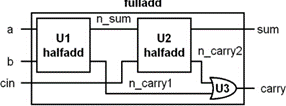

### Running a Full Adder Script

Perform wget and obtain these three files:

    touch fa.v
    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec38/fa_stim.v
    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec38/fa_driver.v
    
    
We will write the module for <code>fa.v</code>
    
To get the numeric output, perform the command:

    irun fa.v fa_stim.v fa_driver.v
    
And to get the SimVision

    irun -access +r -gui fa.v fa_stim.v fa_driver.v
    
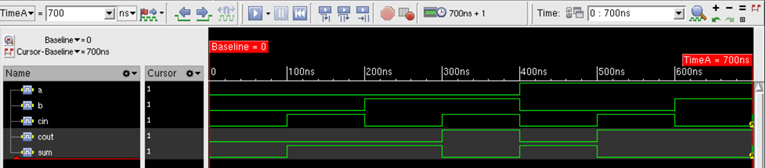
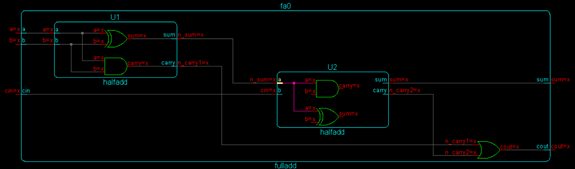

### Parameters

<b>Parameters</b> - a constant value declared within the module structure

The value can be used to define a set of attributes for the module which can characterize its behavior as well as its physical representation.

Parameters can be use for vector widths:

    module shift (shiftOut, dataIn, shiftCount); 
        parameter width = 32;
    
        output [width-1:0] shiftOut; 
        input [width-1:0] dataIn; 
        input [31:0] shiftCount;

        assign shiftOut = dataIn << shiftCount; 
        
    endmodule


#### Design a Multiplexor with the following dimensions. Write Verilog module and testbench

Solution: 

    touch multiplexor.v
    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec38/multiplexor_stim.v
    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec38/multiplexor_driver.v

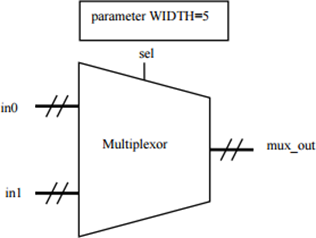

But now we can take advantage of Widths. Open multiplexor.v.

And here is the multiplexor run result:

    > irun multiplexor.v multiplexor_test.v
    ncsim> run
    At time 1 sel=0 in0=10101 in1=00011, mux_out=10101
    At time 2 sel=0 in0=01010 in1=11100, mux_out=01010
    At time 3 sel=1 in0=00001 in1=10101, mux_out=10101
    At time 4 sel=1 in0=10101 in1=01010, mux_out=01010
    TEST PASSED
    Simulation complete via $finish(1) at time 4 NS + 0
    
And here is the Schematic Tracer

    irun -access +r -gui multiplexor.v multiplexor_test.v


### ALU Design and Synthesis

Develop a Verilog module ALU with the following parameters and instructions

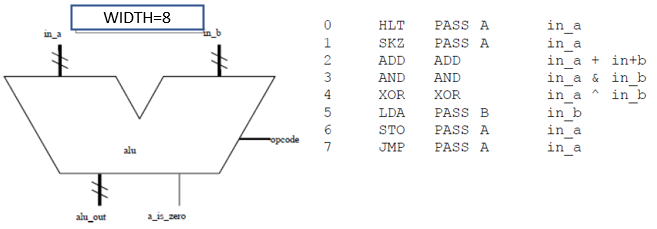

For simplicity, and to prevent for conflicting with your already synthesized ALU, we will design calling this <code>alu_2.v</code>

    touch alu.v

To represent local parameters, we will perform the folllwing:

    localparam PASS0=0, PASS1=1, ADD=2, AND=3, XOR=4, PASSB=5, STO=6, JMP=7;

To test, perform the command:

    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec37/alu_2_test.v
    
Then we will perform the test with:

    irun alu_2.v alu_2_test.v